In [1]:
!unzip "/content/drive/My Drive/74581_169310_bundle_archive.zip"

Archive:  /content/drive/My Drive/74581_169310_bundle_archive.zip
replace loan_data_set.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [64]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

In [65]:
np.random.seed(7)

In [66]:
df = pd.read_csv('loan_data_set.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [67]:
df.shape

(614, 13)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [10]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [11]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [12]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [13]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [14]:
df['Loan_Status'] = df['Loan_Status'].replace('Y',1)
df['Loan_Status'] = df['Loan_Status'].replace('N',0)



In [15]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


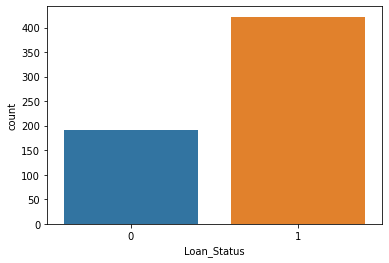

In [16]:
sns.countplot( x = 'Loan_Status', data =df)

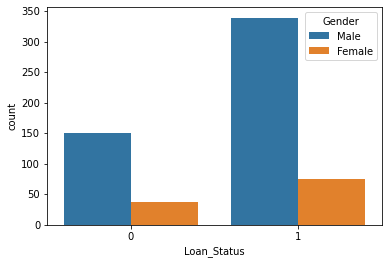

In [17]:
sns.countplot( x = 'Loan_Status', hue = 'Gender', data= df)

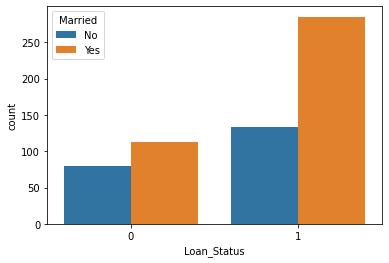

In [18]:
sns.countplot( x = 'Loan_Status', hue = 'Married', data= df)

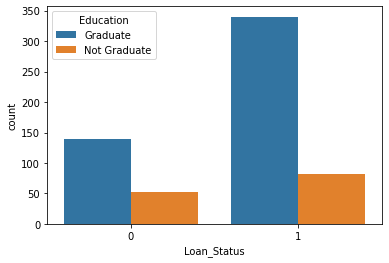

In [19]:
sns.countplot( x = 'Loan_Status', hue = 'Education', data= df)

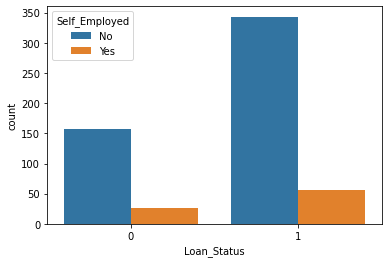

In [20]:
sns.countplot( x = 'Loan_Status', hue = 'Self_Employed', data= df)

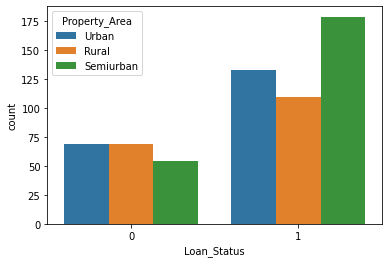

In [21]:
sns.countplot( x ='Loan_Status', hue = 'Property_Area', data= df)

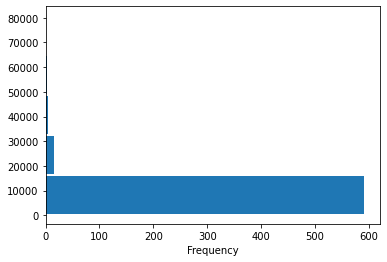

In [22]:
df['ApplicantIncome'].plot.hist(bins = 5, rwidth = 0.95, orientation = 'horizontal') 

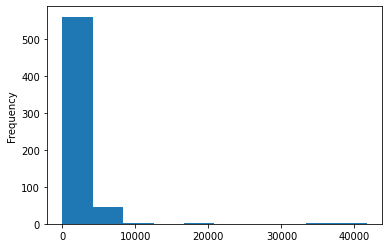

In [23]:
df['CoapplicantIncome'].plot.hist()


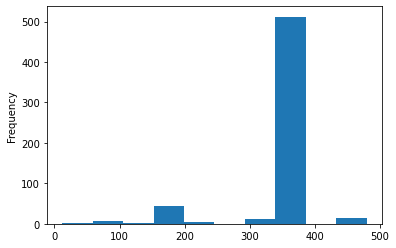

In [24]:
df['Loan_Amount_Term'].plot.hist()

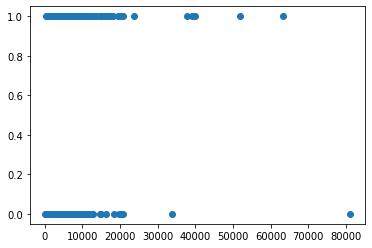

In [25]:
plt.scatter(df['ApplicantIncome'],df['Loan_Status'] )

In [26]:
df = df.rename(columns={'Gender': 'Male' , 'Education' : 'Graduate'})

In [27]:
df.head()

,Loan_ID,Male,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [28]:
df['Male'] = df['Male'].replace('Male',1)
df['Male'] = df['Male'].replace('Female',0)

df['Married'] = df['Married'].replace('No',0)
df['Married'] = df['Married'].replace('Yes',1)

df['Graduate'] = df['Graduate'].replace('Graduate',1)
df['Graduate'] = df['Graduate'].replace('Not Graduate',0)

df['Self_Employed'] = df['Self_Employed'].replace('Yes',1)
df['Self_Employed'] = df['Self_Employed'].replace('No',0)





In [29]:
df.head()

,Loan_ID,Male,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1


In [30]:
df.isnull().sum()

Loan_ID               0
Male                 13
Married               3
Dependents           15
Graduate              0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [31]:
df = df.dropna()

In [32]:
df.shape

(480, 13)

In [33]:
Feature = df[['Male','Married','Graduate','ApplicantIncome','CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]
Feature = pd.concat([Feature,pd.get_dummies(df['Property_Area'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df['Dependents'])], axis=1)


Feature.head()


,Male,Married,Graduate,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Rural,Semiurban,Urban,0,1,2,3+
1,1.0,1.0,1,4583,1508.0,128.0,360.0,1.0,1,0,0,0,1,0,0
2,1.0,1.0,1,3000,0.0,66.0,360.0,1.0,0,0,1,1,0,0,0
3,1.0,1.0,0,2583,2358.0,120.0,360.0,1.0,0,0,1,1,0,0,0
4,1.0,0.0,1,6000,0.0,141.0,360.0,1.0,0,0,1,1,0,0,0
5,1.0,1.0,1,5417,4196.0,267.0,360.0,1.0,0,0,1,0,0,1,0


In [34]:
X = Feature
X[0:5]

,Male,Married,Graduate,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Rural,Semiurban,Urban,0,1,2,3+
1,1.0,1.0,1,4583,1508.0,128.0,360.0,1.0,1,0,0,0,1,0,0
2,1.0,1.0,1,3000,0.0,66.0,360.0,1.0,0,0,1,1,0,0,0
3,1.0,1.0,0,2583,2358.0,120.0,360.0,1.0,0,0,1,1,0,0,0
4,1.0,0.0,1,6000,0.0,141.0,360.0,1.0,0,0,1,1,0,0,0
5,1.0,1.0,1,5417,4196.0,267.0,360.0,1.0,0,0,1,0,0,1,0


In [35]:
y = df['Loan_Status']
y[0:5]

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status, dtype: int64

In [36]:
X= preprocessing.StandardScaler().fit_transform(X)
X[0:5]

array([[ 0.46719815,  0.73716237,  0.50325312, -0.13796959, -0.02795204,
        -0.20808917,  0.27554157,  0.41319694,  1.5662814 , -0.81295735,
        -0.67419986, -1.15329835,  2.23606798, -0.46388563, -0.30560445],
       [ 0.46719815,  0.73716237,  0.50325312, -0.4175358 , -0.604633  ,
        -0.97900085,  0.27554157,  0.41319694, -0.63845488, -0.81295735,
         1.4832397 ,  0.86707832, -0.4472136 , -0.46388563, -0.30560445],
       [ 0.46719815,  0.73716237, -1.98707162, -0.49118022,  0.29710022,
        -0.30756164,  0.27554157,  0.41319694, -0.63845488, -0.81295735,
         1.4832397 ,  0.86707832, -0.4472136 , -0.46388563, -0.30560445],
       [ 0.46719815, -1.35655324,  0.50325312,  0.11228014, -0.604633  ,
        -0.04644639,  0.27554157,  0.41319694, -0.63845488, -0.81295735,
         1.4832397 ,  0.86707832, -0.4472136 , -0.46388563, -0.30560445],
       [ 0.46719815,  0.73716237,  0.50325312,  0.00931924,  0.99997795,
         1.52024509,  0.27554157,  0.41319694, 

In [37]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.33, random_state=42)

In [40]:
trainScores={}

In [41]:
from sklearn.neighbors import KNeighborsClassifier

bestScore=0.0
accList=[]

for k in range(3,12):
    
    clf_knn = KNeighborsClassifier(n_neighbors=k,algorithm='auto')
    
    # using 10 fold cross validation for scoring the classifier's accuracy
    scores = cross_val_score(clf_knn, X_train, y_train, cv=10)
    score=scores.mean()
    accList.append(score)
    
    if score > bestScore:
        bestScore=score
        best_clf=clf_knn
        bestK=k
        
print("Best K is :",bestK,"| Cross validation Accuracy :",bestScore)
clf_knn=best_clf

Best K is : 3 | Cross validation Accuracy : 0.7568181818181818


In [42]:
clf_knn.fit(X_train,y_train)
y_pred=best_clf.predict(X_train)

In [43]:
trainScores['KNN-jaccard']=jaccard_similarity_score(y_train, y_pred)
trainScores['KNN-f1-score']=f1_score(y_train, y_pred, average='weighted')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [44]:
trainScores

{'KNN-f1-score': 0.8016934476816698, 'KNN-jaccard': 0.8161993769470405}

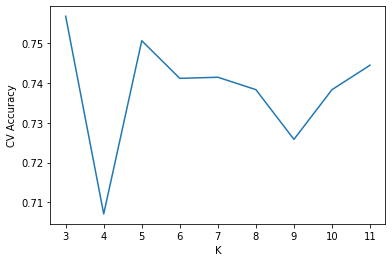

In [45]:

plt.plot(range(3,12),accList)
plt.xlabel('K')
plt.ylabel('CV Accuracy')
plt.show()

In [46]:
from sklearn import tree

clf_tree = tree.DecisionTreeClassifier()
clf_tree = clf_tree.fit(X_train, y_train)

y_pred=clf_tree.predict(X_train)

In [47]:
trainScores['Tree-jaccard']=jaccard_similarity_score(y_train, y_pred)
trainScores['Tree-f1-score']=f1_score(y_train, y_pred, average='weighted')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [48]:
trainScores

{'KNN-f1-score': 0.8016934476816698,
 'KNN-jaccard': 0.8161993769470405,
 'Tree-f1-score': 1.0,
 'Tree-jaccard': 1.0}

In [49]:
y_train=y_train.astype(float)
from sklearn import svm

clf_svm = svm.LinearSVC(random_state=7)
clf_svm.fit(X_train, y_train)  

y_pred=clf_svm.predict(X_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [50]:
trainScores['SVM-jaccard']=jaccard_similarity_score(y_train, y_pred)
trainScores['SVM-f1-score']=f1_score(y_train, y_pred, average='weighted')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [51]:
trainScores

{'KNN-f1-score': 0.8016934476816698,
 'KNN-jaccard': 0.8161993769470405,
 'SVM-f1-score': 0.7943718141018244,
 'SVM-jaccard': 0.8130841121495327,
 'Tree-f1-score': 1.0,
 'Tree-jaccard': 1.0}

In [52]:
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
clf_log.fit(X_train, y_train)

y_pred=clf_log.predict(X_train)
y_proba=clf_log.predict_proba(X_train)

In [54]:

testScores={}

In [55]:
knn_pred=clf_knn.predict(X_test)
testScores['KNN-jaccard']=jaccard_similarity_score(y_test, knn_pred)
testScores['KNN-f1-score']=f1_score(y_test, knn_pred, average='weighted')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [56]:
tree_pred=clf_tree.predict(X_test)
testScores['Tree-jaccard']=jaccard_similarity_score(y_test, tree_pred)
testScores['Tree-f1-score']=f1_score(y_test, tree_pred, average='weighted')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [59]:
svm_pred=clf_svm.predict(X_test)
testScores['SVM-jaccard']=jaccard_similarity_score(y_test, svm_pred)
testScores['SVM-f1-score']=f1_score(y_test, svm_pred, average='weighted')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [61]:
log_pred=clf_log.predict(X_test)
proba=clf_log.predict_proba(X_test)
testScores['LogReg-jaccard']=jaccard_similarity_score(y_test, log_pred)
testScores['LogReg-f1-score']=f1_score(y_test, log_pred, average='weighted')  
testScores['LogReg-logLoss']=log_loss(y_test, proba)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [62]:
trainScores


{'KNN-f1-score': 0.8016934476816698,
 'KNN-jaccard': 0.8161993769470405,
 'SVM-f1-score': 0.7943718141018244,
 'SVM-jaccard': 0.8130841121495327,
 'Tree-f1-score': 1.0,
 'Tree-jaccard': 1.0}

In [63]:

testScores

{'KNN-f1-score': 0.7381360777587193,
 'KNN-jaccard': 0.7735849056603774,
 'LogReg-f1-score': 0.7689140226321136,
 'LogReg-jaccard': 0.8050314465408805,
 'LogReg-logLoss': 0.46282779226667575,
 'SVM-f1-score': 0.7689140226321136,
 'SVM-jaccard': 0.8050314465408805,
 'Tree-f1-score': 0.7088272944843325,
 'Tree-jaccard': 0.710691823899371}